### Map of offshore areas considered

In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from constants import ENERGY_HUBS

df = pd.read_csv("../EMPIRE_extension/Output/OW_nodes.csv").drop(columns=["geometry"])
df

,Node,Longitude,Latitude
0,Moray Firth,-2.990229,58.170702
1,Firth of Forth,-2.047535,56.363729
2,Dogger Bank,2.333333,54.833333
3,Hornsea,1.845196,53.820112
4,Outer Dowsing,0.905074,53.311186
5,Norfolk,2.168638,52.782831
6,East Anglia,1.883496,51.890054
7,Borssele,3.197221,51.957807
8,Hollandsee Kust,4.008061,52.462704
9,Helgoländer Bucht,7.167722,54.322931


New hubs based on North Sea (NO) exclusive economic zones: https://www.marineregions.org/gazetteer.php?p=details&id=5686

In [2]:
# Append new hubs
hub_1 = ["Energyhub North", 1.44, 58.42]
hub_2 = ["Energyhub Central", 3.29, 56.05]

df.loc[len(df)] = hub_1
df.loc[len(df)] = hub_2
df

,Node,Longitude,Latitude
0,Moray Firth,-2.990229,58.170702
1,Firth of Forth,-2.047535,56.363729
2,Dogger Bank,2.333333,54.833333
3,Hornsea,1.845196,53.820112
4,Outer Dowsing,0.905074,53.311186
5,Norfolk,2.168638,52.782831
6,East Anglia,1.883496,51.890054
7,Borssele,3.197221,51.957807
8,Hollandsee Kust,4.008061,52.462704
9,Helgoländer Bucht,7.167722,54.322931


In [3]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for _, point in a.iterrows():
        ax.scatter(point["x"], point["y"])
        ax.text(point['x']+.02, point['y'], str(point['val']))

Location of included wind farm sites and considered energy hubs in the North Sea


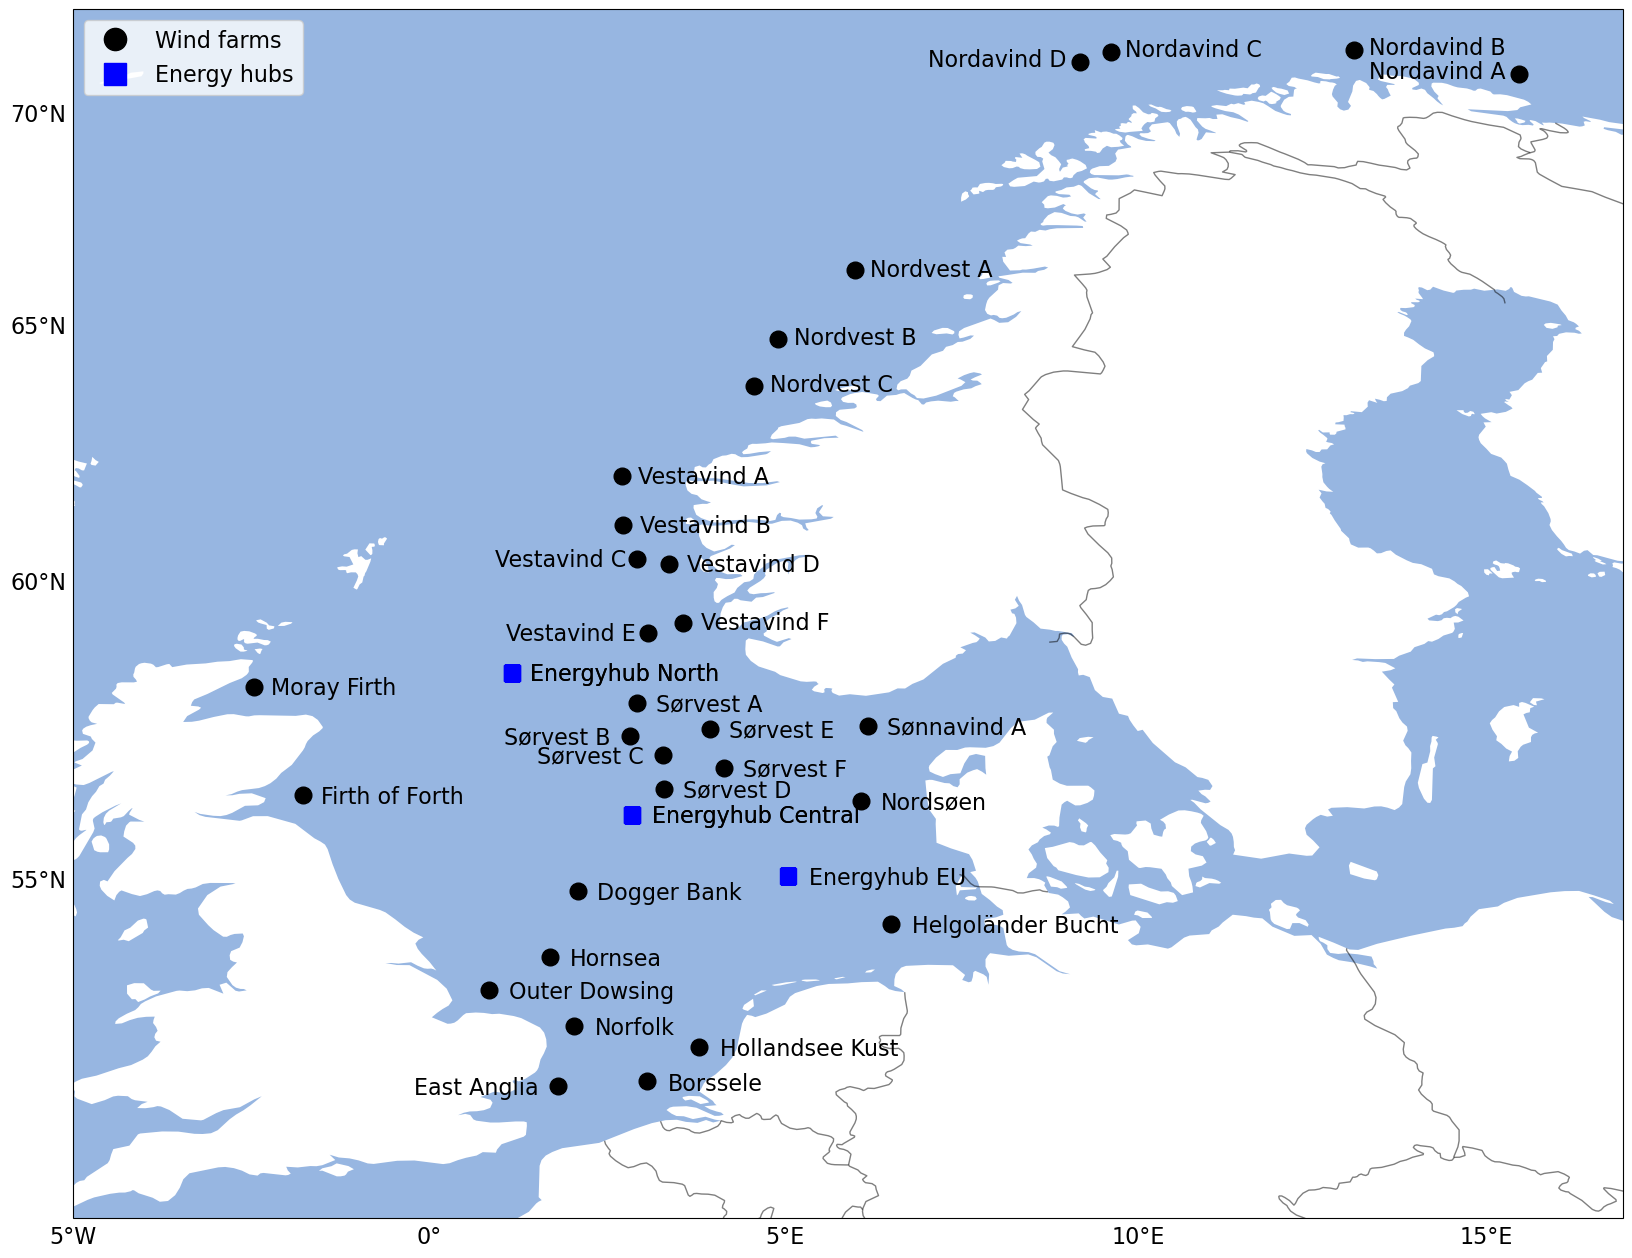

In [4]:
TEXT_TO_LEFT = dict({
    "East Anglia": -2.1,
    "Sørvest B": -2.1,
    "Sørvest C": -2.1, 
    "Vestavind C": -2.6, 
    "Vestavind E": -2.5, 
    "Nordavind A": -5,
    "Nordavind D": -4.6})

print('Location of included wind farm sites and considered energy hubs in the North Sea')
fig = plt.figure(figsize=(20,20))
ax = plt.axes(projection=ccrs.Orthographic())
ax.add_feature(cartopy.feature.BORDERS.with_scale('50m'), alpha=.5)
ax.add_feature(cartopy.feature.LAND.with_scale('50m'), facecolor="white")
ax.add_feature(cartopy.feature.OCEAN.with_scale('50m'))
for idx, df_row in df.iterrows():
    if df_row["Node"] in ENERGY_HUBS:
        plt.plot(df_row["Longitude"], df_row["Latitude"], marker="s", markersize=12 ,color="blue", transform=ccrs.Geodetic())
    else:
        plt.plot(df_row["Longitude"], df_row["Latitude"], marker="o", markersize=12, color="black", transform=ccrs.Geodetic())
    #plt.text(df_row["Longitude"]+0.2, df_row["Latitude"], idx+1, fontsize=8, transform=ccrs.Geodetic())
    if df_row["Node"] in TEXT_TO_LEFT.keys():
        plt.text(df_row["Longitude"]+TEXT_TO_LEFT[df_row["Node"]], df_row["Latitude"]-0.125, df_row["Node"], fontsize=16, transform=ccrs.Geodetic())
    else:
        plt.text(df_row["Longitude"]+0.3, df_row["Latitude"]-0.125, df_row["Node"], fontsize=16, transform=ccrs.Geodetic())
ax.set_extent([-5, 17, 50, 73], crs=ccrs.PlateCarree())

# Axes
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([-5, 0, 5, 10, 15, 20])
gl.ylocator = mticker.FixedLocator([45, 50, 55, 60, 65, 70, 75])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Legend
legd_wind_farms = mlines.Line2D([], [], ls='', color='black', marker='o',
                          markersize=16, label='Wind farms')
legd_energy_hubs = mlines.Line2D([], [], ls='', color='blue', marker='s',
                          markersize=16, label='Energy hubs')
ax.legend(handles=[legd_wind_farms, legd_energy_hubs], loc="upper left", fontsize=16, facecolor="white")
plt.show()